<a href="https://colab.research.google.com/github/Ali-Tahseen/Time_Series_Bitcoin_Prediction_ARIMA/blob/main/ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting Bitcoin Prices using ARIMA model**

ARIMA(Autoregressive Integrated Moving Average)

# Install library that uses yahoo finance

In [38]:
# yahoo price

In [39]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Predicting Bitcoin Prices for the next day**

In [40]:
import yfinance as yf 

In [41]:
# All the historical prices of bitcoin
# Ourdataset
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [42]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-10-03 00:00:00+00:00,19044.068359,19653.542969,19025.226562,19623.580078,19623.580078,30484729489
2022-10-04 00:00:00+00:00,19623.583984,20380.343750,19523.839844,20336.843750,20336.843750,35887278685
2022-10-05 00:00:00+00:00,20335.900391,20343.748047,19801.800781,20160.716797,20160.716797,33223790572


In [43]:
len(df)

2943

In [44]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

<function matplotlib.pyplot.show(*args, **kw)>

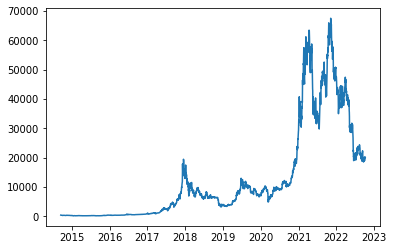

In [45]:
# Visualize the chart of bitcoin prices
plt.plot(df.index, df['Adj Close'])
plt.show

In [46]:
# Train test split of dataset
# Use 90% of the dataset as the test set
to_row = int(len(df)*0.9)

# Visualizing the training dataset
training_data = df[0:to_row]['Adj Close']
training_data

Date
2014-09-17 00:00:00+00:00      457.334015
2014-09-18 00:00:00+00:00      424.440002
2014-09-19 00:00:00+00:00      394.795990
2014-09-20 00:00:00+00:00      408.903992
2014-09-21 00:00:00+00:00      398.821014
                                 ...     
2021-12-12 00:00:00+00:00    50098.335938
2021-12-13 00:00:00+00:00    46737.480469
2021-12-14 00:00:00+00:00    46612.632812
2021-12-15 00:00:00+00:00    48896.722656
2021-12-16 00:00:00+00:00    47665.425781
Name: Adj Close, Length: 2648, dtype: float64

In [47]:
# Covert training data to list
training_data = list(df[0:to_row]['Adj Close'])
# Convert test data to list
testing_data = list(df[to_row:]['Adj Close'])

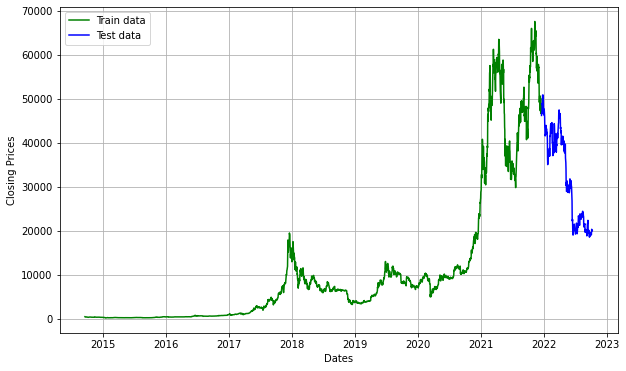

In [48]:
# Visualize the whole dataset with train and test split
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label='Train data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label='Test data')
plt.legend()

In [58]:
model_predictions = []
# Observation will be the remaining 10% dataset which is the test set
n_test_obser = len(testing_data)
n_test_obser

295

In [59]:
# The model will be a rolling model since our dataset is historical data
# Change the training set for all the iteration that will be used to predict the prices
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (4,1,0)) 
    # p,d,q respectively
    # Can change numbers to get different model
    # Auto Arima better because it takes different values of p,d,q and gives the best value after all the iterations
    model_fit = model.fit()
    output = model_fit.forecast()
    #  Get the first value which is the actual prediction aka Y-hat
    yhat = list(output[0])[0]
    # append the model predictions to the list model_predictions = [] to plot the graph
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    # Keep on updating the training set
    # all our models should be updated with the new training data because our dataset is historical data
    training_data.append(actual_test_value)
    # print(output)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  Conv

In [60]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2943
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -23851.769
Method:                       css-mle   S.D. of innovations            800.821
Date:                Fri, 07 Oct 2022   AIC                          47715.538
Time:                        04:12:49   BIC                          47751.461
Sample:                             1   HQIC                         47728.472
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6253     15.228      0.435      0.664     -23.222      36.472
ar.L1.D.y     -0.0264      0.018     -1.436      0.151      -0.063       0.010
ar.L2.D.y      0.0056      0.018      0.302      0.7

In [61]:
len(model_predictions)

295

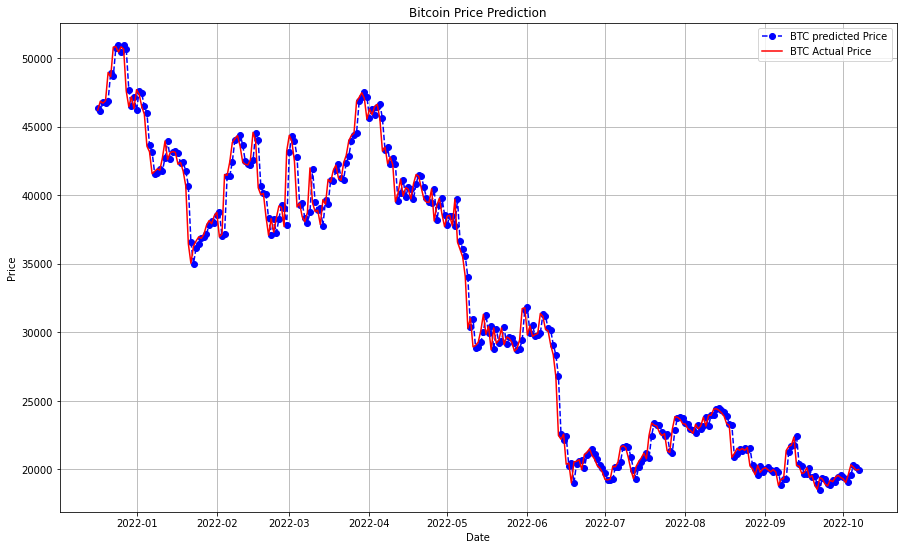

In [62]:
# viualise the data thorugh graph
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BTC predicted Price')
plt.plot(date_range, testing_data, color='red', label= 'BTC Actual Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [64]:
# report the peformance
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: ' +str(mape)) #Mean Absolute Percentage Error

# Around 2.44% MAPE(Mean Absolute Percentage Error) implies the model is about 97.66% accurate in predicting the test set observations.

MAPE: 0.024432110994803097
